In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset and displaying the first 5 rows
data = pd.read_csv("data/city_hour.csv")
data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [3]:
# Filtering the data for Delhi only
data = data[data['City'] == 'Delhi']
data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
245172,Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN
245173,Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN
245174,Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN
245175,Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN
245176,Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN


In [4]:
# Converting the Datetime column to datetime format

data['Datetime'] = pd.to_datetime(data['Datetime'])
data.Datetime.dtypes

# <M8[ns] : Datetime format

dtype('<M8[ns]')

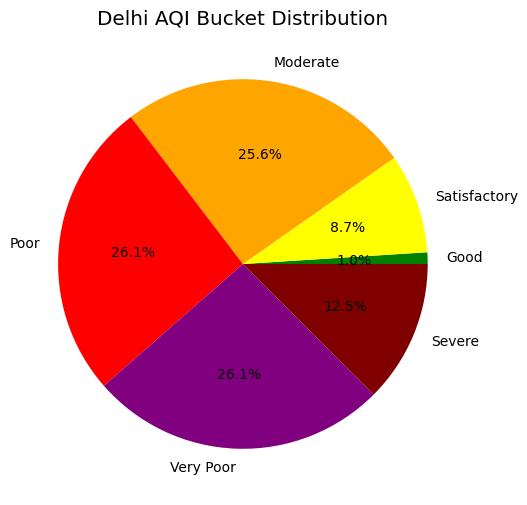

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
colors = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']
# Create a legend for the pie chart

plt.pie(pd.Categorical(data['AQI_Bucket'], categories=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']).value_counts(), labels = pd.Categorical(data['AQI_Bucket'], categories=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']).value_counts().index, autopct='%1.1f%%', colors=colors)

#Give appropriate title
plt.title('Delhi AQI Bucket Distribution')
plt.savefig('AQI_Bucket_Pie.png')
plt.show()

In [6]:
# Checking percentage of null values
pd.concat([data.isnull().sum().sort_values(ascending=False), round((data.isnull().sum()/data.isnull().count()*100), 2).sort_values(ascending=False)], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Xylene,18904,39.23
SO2,2852,5.92
PM10,2421,5.02
O3,2201,4.57
NH3,980,2.03
AQI,498,1.03
AQI_Bucket,498,1.03
PM2.5,375,0.78
CO,364,0.76
NO2,330,0.68


In [7]:
# Dropping the Xylene column as it has a lot of null values
data.drop(['Xylene'], axis = 1, inplace = True)

# Dropping the City column as they are not required
data.drop(['City'], axis = 1, inplace = True)

# Filling the remaining null values with the previous value
data.fillna(method='ffill', inplace = True)
data.isna().sum()

Datetime       0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
AQI           15
AQI_Bucket    15
dtype: int64

In [8]:
# Filling the remaining null values with the next value

data.fillna(method='bfill', inplace = True)
data.isna().sum()

Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

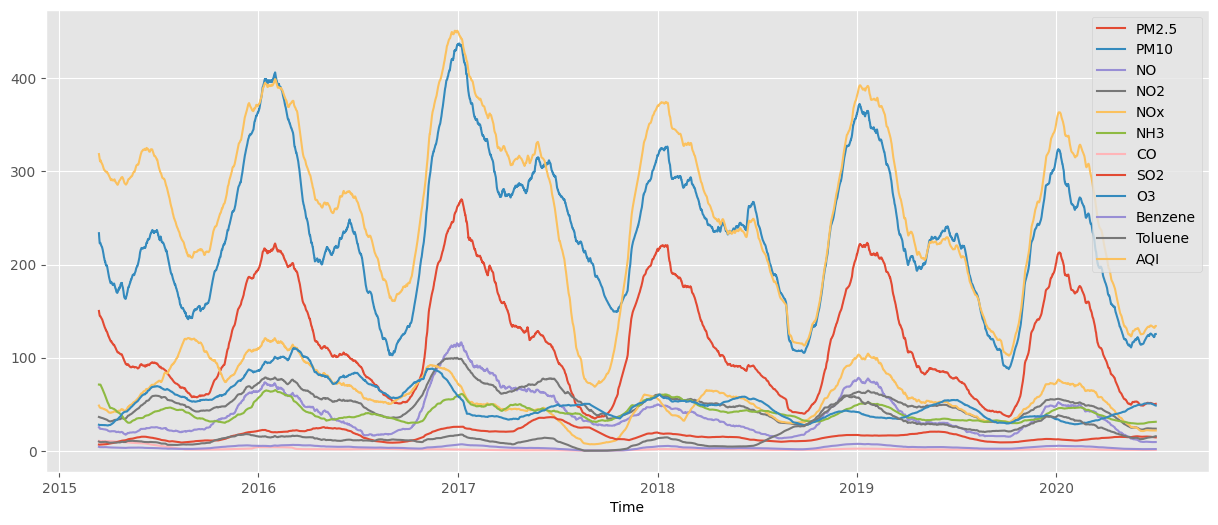

In [9]:
# Plotting the Graphs for the different parameters
# Available Paramters: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']
params = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

plotDF = data[['Datetime'] + params]
plotDF = plotDF.dropna()

plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
for x in params:
    plt.plot(plotDF['Datetime'], plotDF[x].rolling(1750).mean(), label = x)

plt.legend(loc="upper right")
plt.xlabel('Time')
plt.savefig('Delhi_AQI.png')
plt.show()

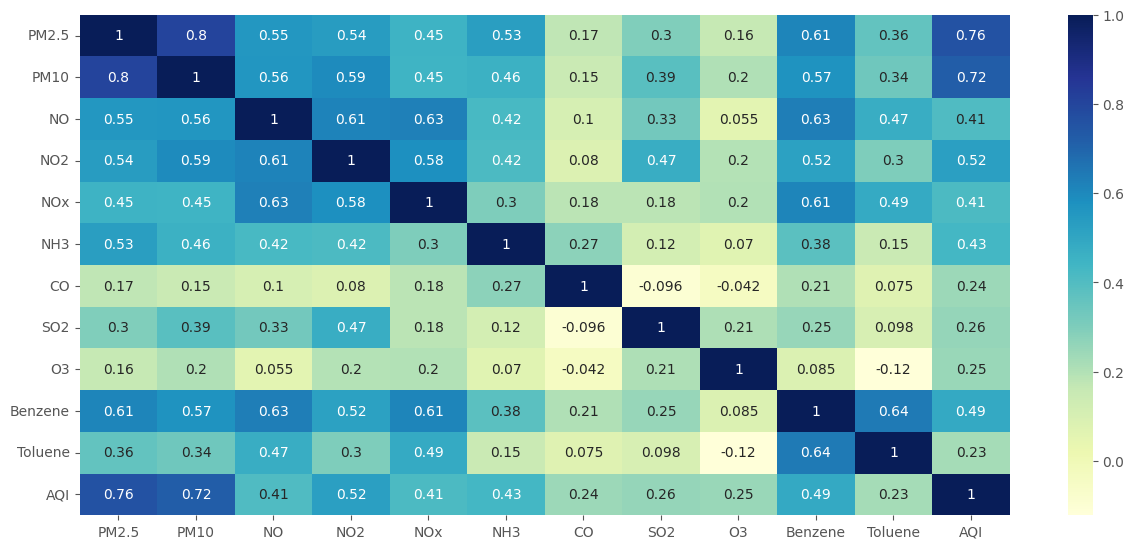

In [10]:
# Plotting the Heatmap of the correlation between the parameters
# Available Paramters: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']
params = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

plt.figure(figsize = (15, 6.5))

sns.heatmap(data[params].corr(), annot = True, cmap="YlGnBu")
plt.savefig('AQI_Heatmap.png')

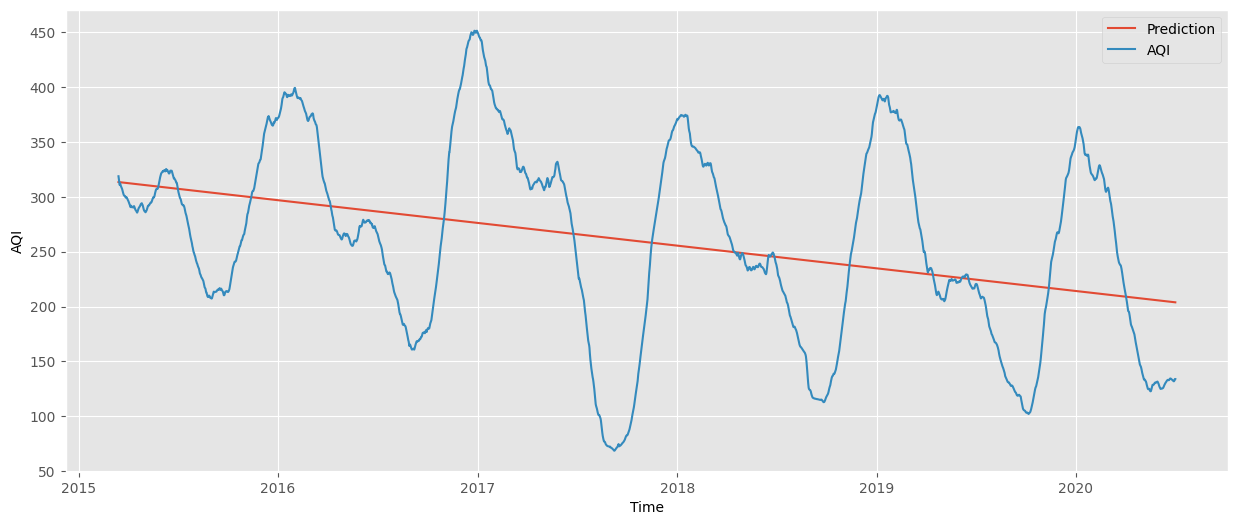

In [11]:
from sklearn.linear_model import LinearRegression

# Training data
data['Time'] = np.arange(len(data.index))
X = data.loc[:, ['Time']]  # features
y = data.loc[:, 'AQI']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
data['Prediction'] = pd.Series(model.predict(X), index=X.index)

plotDF = data[['Datetime', 'Prediction', 'AQI']]
plotDF = plotDF.dropna()

plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
for x in ['Prediction', 'AQI']:
    plt.plot(plotDF['Datetime'], plotDF[x].rolling(1750).mean(), label = x)

plt.legend(loc="upper right")
plt.xlabel('Time')
plt.ylabel('AQI')
plt.savefig('AQI_Prediction.png')
plt.show()

In [12]:
# Get index for 2016-01-01 00:00:00
print(data[data['Datetime'] == '2016-01-01 00:00:00'].index[0])
print(data[data['Datetime'] == '2017-01-01 00:00:00'].index[0])
print(data[data['Datetime'] == '2018-01-01 00:00:00'].index[0])
print(data[data['Datetime'] == '2019-01-01 00:00:00'].index[0])
print(data[data['Datetime'] == '2020-01-01 00:00:00'].index[0])


253931
262715
271475
280235
288995


In [13]:
print(data._get_value(253931, 'Prediction'))
print(data._get_value(262715, 'Prediction'))
print(data._get_value(271475, 'Prediction'))
print(data._get_value(280235, 'Prediction'))
print(data._get_value(288995, 'Prediction'))

294.77214917287864
274.06207267465254
253.4085810848916
232.75508949513062
212.10159790536966


In [14]:
print(-data._get_value(253931, 'Prediction') + data._get_value(262715, 'Prediction'))
print(-data._get_value(262715, 'Prediction') + data._get_value(271475, 'Prediction'))
print(-data._get_value(271475, 'Prediction') + data._get_value(280235, 'Prediction'))
print(-data._get_value(280235, 'Prediction') + data._get_value(288995, 'Prediction'))

-20.7100764982261
-20.653491589760932
-20.65349158976099
-20.65349158976096


In [15]:
print((-20.7100764982261 / 294.77214917287864)*100)
print((-20.65349158976099 / 274.06207267465254)*100)
print((-20.653491589760932 / 253.4085810848916)*100)
print((-20.65349158976096 / 232.75508949513062)*100)

-7.025791465149582
-7.536063413735975
-8.150273168074776
-8.873486562446594


## Aproximately 8 percent reduction in air pollution per year

In [16]:
print(round((-7.025791465149582 + -7.536063413735975 + -8.150273168074776 + -8.873486562446594) / 4, 2))

-7.9
